In [1]:
import numpy as np
import matplotlib.pylab as plt
import os
from PIL import Image
import sklearn.cluster
from skimage import io
from skimage.segmentation import quickshift
import cv2

In [2]:
def load_images(data_dir = 'Training_Data/', ext='.tif'):
    training_files = os.listdir(data_dir)
    images = []
    for file in training_files:
        file_name, file_ext = os.path.splitext(file)
        if file_ext == ext:
            images.append(io.imread(os.path.join(data_dir, file)))
    return images

In [66]:
images = load_images()

In [67]:
image = cv2.imread('Training_Data/Or 13006_0172.tif')

In [8]:
im_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [68]:
cv2.imshow('image', image)

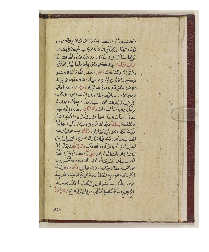

In [69]:
plt.imshow(image)
plt.axis('off')
plt.show()

202
187
154


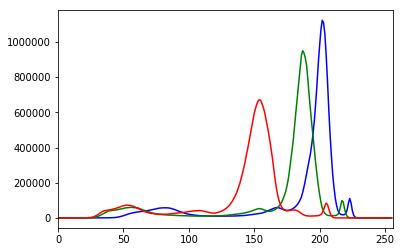

In [35]:
color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[256],[0,256])
    print(np.argmax(histr))
    plt.plot(histr,color=col)
    plt.xlim([0,256])
plt.show()

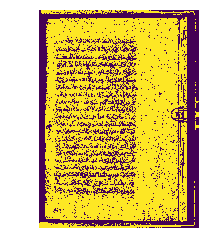

In [98]:
max_pixel = (202, 187, 154)
tol = (10, 20, 80)
low_threshold   = np.array([max_pixel[0] - tol[0], max_pixel[1] - tol[1], max_pixel[2] - tol[2]])
upper_threshold = np.array([max_pixel[0] + tol[0], max_pixel[1] + tol[1], max_pixel[2] + tol[2]])
mask = cv2.inRange(image, low_threshold, upper_threshold)
plt.imshow(mask)
plt.axis('off')
plt.show()

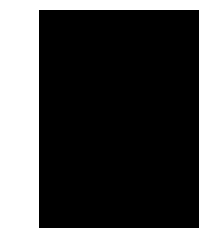

In [62]:
res = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(res)
plt.axis('off')
plt.show()

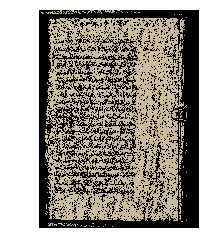

In [ ]:
segments = quickshift(image, kernel_size=40, convert2lab=False, max_dist=10, ratio=0.5)

In [ ]:
plt.imshow(segments)

In [ ]:
import numpy as np
import scipy.signal
from skimage import io, color
from skimage import exposure
import matplotlib.pyplot as plt
import os
data_dir = 'Training_Data/'
img = io.imread(os.path.join(data_dir, 'Add MS 7474_0013.tif'))
print(img.shape)
# Load the image
# img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)
print(img.shape)
kernel = np.array([[[0,-1,0],[-1,5,-1],[0,-1,0]],
                   [[0,-1,0],[-1,5,-1],[0,-1,0]]
                  ])
print(kernel.shape)
# you can use 'valid' instead of 'same', then it will not add zero padding
image_sharpen = scipy.signal.convolve2d(img, kernel, 'same')
# print ('\n First 5 columns and rows of the image_sharpen matrix: \n', image_sharpen[:5,:5]*255)

# Adjust the contrast of the filtered image by applying Histogram Equalization 
# image_sharpen_equalized = exposure.equalize_adapthist(image_sharpen/np.max(np.abs(image_sharpen)), clip_limit=0.03)
plt.imshow(image_sharpen)
plt.axis('off')
plt.show()

In [ ]:
print(kernel.shape)

In [ ]:
plt.imshow(image_sharpen, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [ ]:
import matplotlib.pylab as plt

def simple_threshold(im, threshold=128):
    return ((im > threshold) * 255).astype("uint8")

thresholds = [100,120,128,138,150]
im = plt.imread(os.path.join(data_dir, 'Add MS 7474_0013.tif'))
fig, axs = plt.subplots(nrows=1, ncols=len(thresholds), figsize=(20,5));
gray_im = to_grayscale(im)
                        
for t, ax in zip(thresholds, axs):
    ax.imshow(simple_threshold(gray_im, t), cmap='Greys');
    ax.set_title("Threshold: {}".format(t), fontsize=20);
    ax.set_axis_off();